In [55]:
import pandas as pd
import requests
import time
import csv
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [59]:
# Load H2 csv T1|
path1 = '/Users/mbouch17/Desktop/IronHack/Labs &  Project/sql-database/H2_T1_ regency_customer_csv.csv'
df1 = pd.read_csv(path1)
df1

,RecencySegment,CustomerCount
0,Recent,590
1,Very Recent,650
2,Older,776


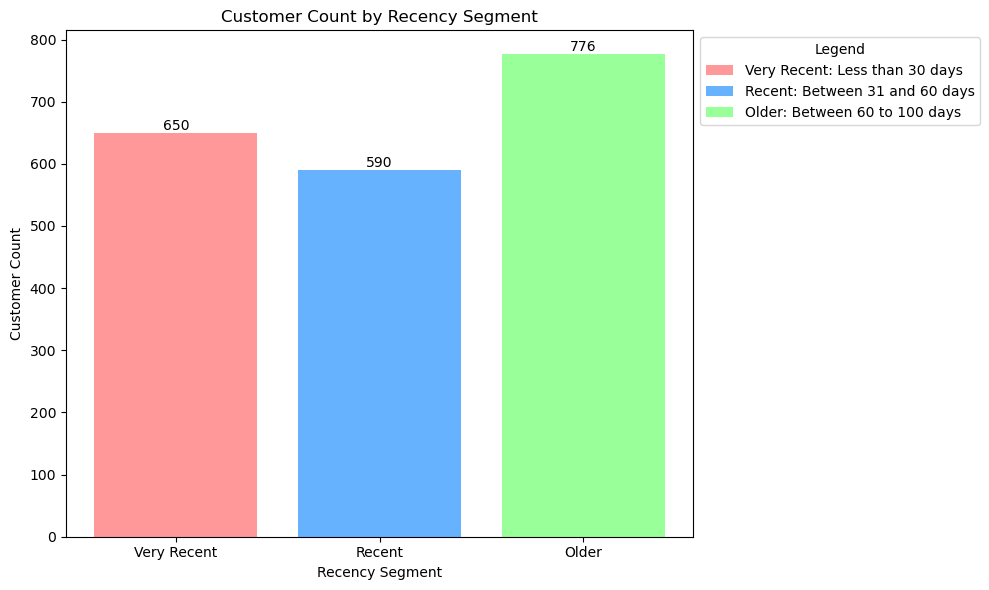

In [51]:
#-------------------Complementary Cleaning----------------#
#Renaming columns:
df1 = df1.rename(columns={'RecencySegment': 'Regency_segment', 'CustomerCount': 'Customer_count'})

#Reordering the dataframe
order = ['Very Recent', 'Recent', 'Older', 'Total']
df1 = df1.sort_values('Regency_segment', key=lambda x: pd.Categorical(x, categories=order, ordered=True))
df1

#-------------------Creating visualization----------------#

# Assuming df1 is your DataFrame
# First, let's sort the DataFrame to ensure consistent order
df1_sorted = df1[df1['Regency_segment'] != 'Total'].sort_values('Regency_segment', ascending=False)

# Now create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(df1_sorted['Regency_segment'], df1_sorted['Customer_count'], 
               color=['#FF9999', '#66B2FF', '#99FF99'])

# The rest of your code remains the same
# ...

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height}',
             ha='center', va='bottom')

# Customize the chart
plt.title('Customer Count by Recency Segment')
plt.xlabel('Recency Segment')
plt.ylabel('Customer Count')

# Add legend
legend_labels = [
    'Very Recent: Less than 30 days',
    'Recent: Between 31 and 60 days',
    'Older: Between 60 to 100 days'
]
plt.legend(bars, legend_labels, title='Legend', loc='upper left', bbox_to_anchor=(1, 1))

# Adjust layout to prevent cutting off the legend
plt.tight_layout()

# Show the plot
plt.show()

In [13]:
# Load H2 csv T2 & T3|
path2 = '/Users/mbouch17/Desktop/IronHack/Labs &  Project/sql-database/H2_T2_ purchases _recency_segment_csv.csv'
df2 = pd.read_csv(path2)
df2

,RecencySegment,AvgWebPurchases,AvgCatalogPurchases,AvgStorePurchases,TotalWebPurchases,TotalCatalogPurchases,TotalStorePurchases
0,Recent,4.0576,2.6102,5.7695,2394,1540,3404
1,Very Recent,4.1846,2.6554,5.8585,2720,1726,3808
2,Older,4.1057,2.8119,5.8389,3186,2182,4531


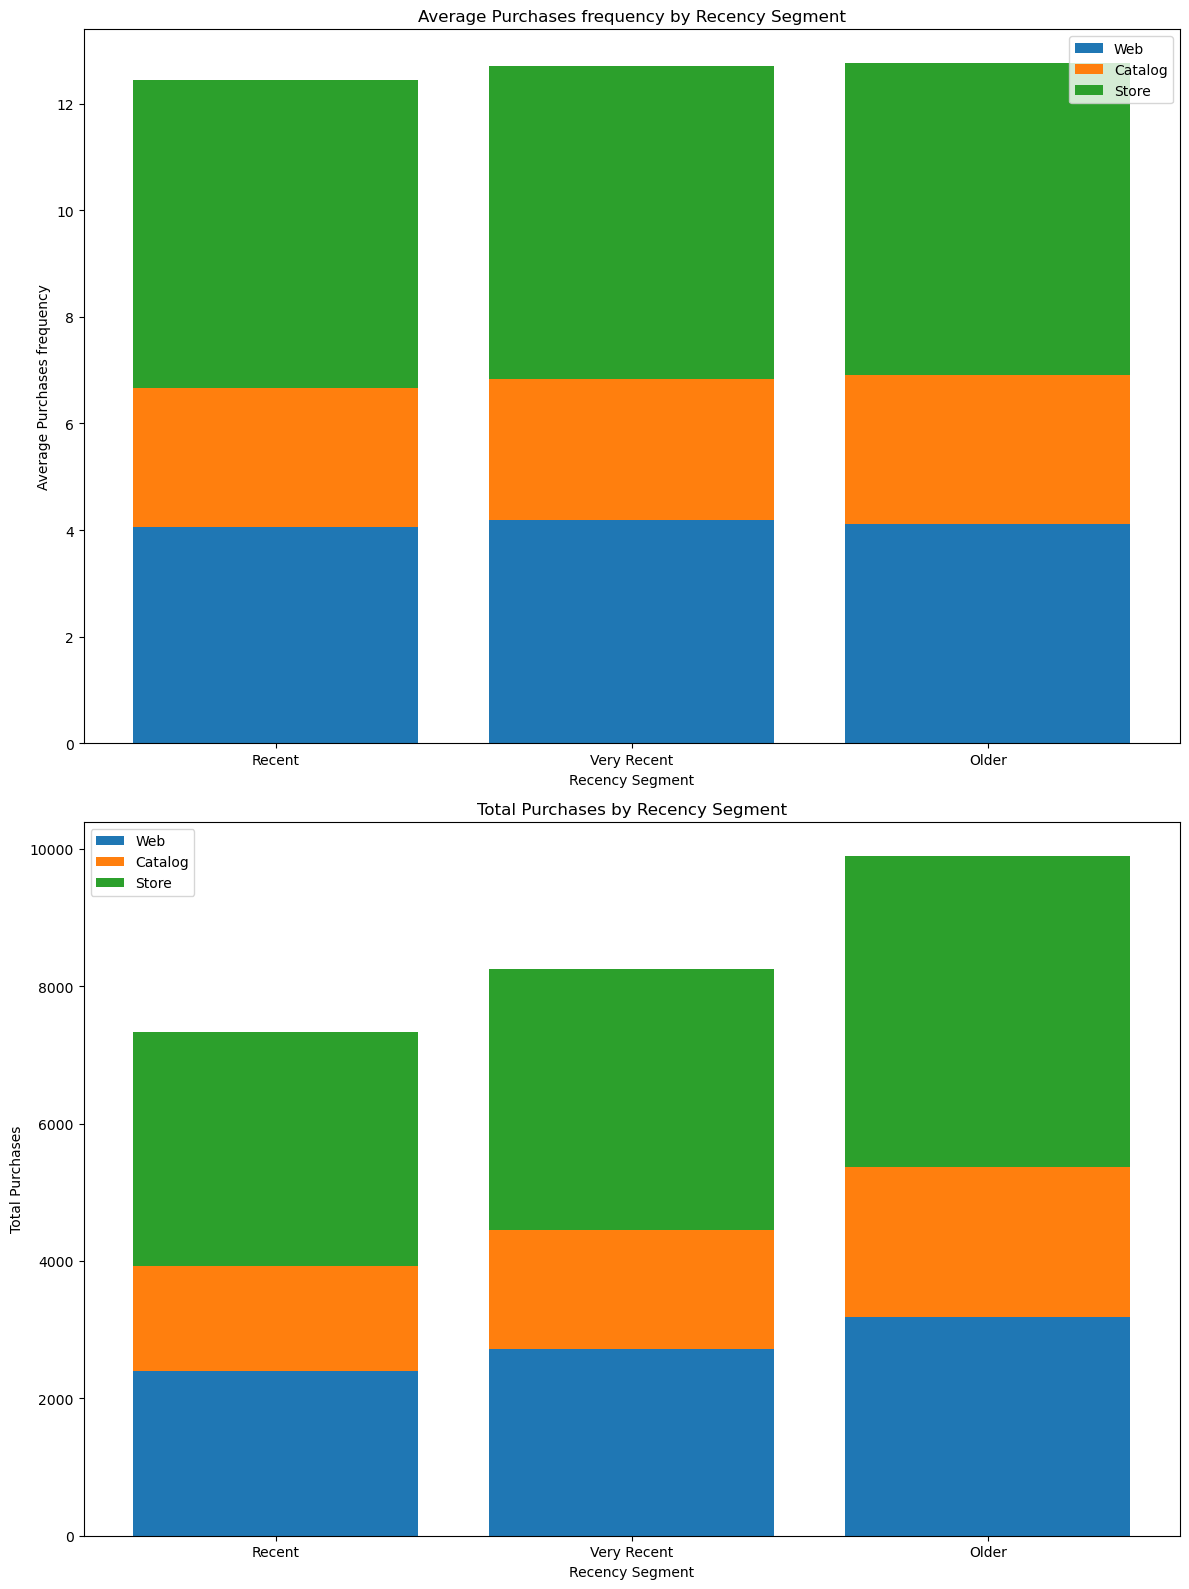

In [99]:
#-------------------Complementary Cleaning----------------#
# Rename columns
df2.columns = [
    'recency_segment',
    'avg_web_purchases',
    'avg_catalog_purchases',
    'avg_store_purchases',
    'total_web_purchases',
    'total_catalog_purchases',
    'total_store_purchases'
]
#-------------------Creating visualization----------------#

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 16))

# Plot for average purchases
ax1.bar(df2['recency_segment'], df2['avg_web_purchases'], label='Web')
ax1.bar(df2['recency_segment'], df2['avg_catalog_purchases'], bottom=df2['avg_web_purchases'], label='Catalog')
ax1.bar(df2['recency_segment'], df2['avg_store_purchases'], 
        bottom=df2['avg_web_purchases'] + df2['avg_catalog_purchases'], label='Store')

ax1.set_title('Average Purchases frequency by Recency Segment')
ax1.set_xlabel('Recency Segment')
ax1.set_ylabel('Average Purchases frequency')
ax1.legend()

# Plot for total purchases
ax2.bar(df2['recency_segment'], df2['total_web_purchases'], label='Web')
ax2.bar(df2['recency_segment'], df2['total_catalog_purchases'], bottom=df2['total_web_purchases'], label='Catalog')
ax2.bar(df2['recency_segment'], df2['total_store_purchases'], 
        bottom=df2['total_web_purchases'] + df2['total_catalog_purchases'], label='Store')

ax2.set_title('Total Purchases by Recency Segment')
ax2.set_xlabel('Recency Segment')
ax2.set_ylabel('Total Purchases')
ax2.legend()

plt.tight_layout()
plt.show()

In [69]:
# Load H2 csv T4|
path4 = '/Users/mbouch17/Desktop/IronHack/Labs &  Project/sql-database/H2_T4_ percentage_purchases _channels_recency_segment_csv.csv'
df4 = pd.read_csv(path4)
df4

,RecencySegment,WebPurchasesPercentage,CatalogPurchasesPercentage,StorePurchasesPercentage
0,Recent,32.6247,20.9866,46.3887
1,Very Recent,32.9537,20.9111,46.1352
2,Older,32.1851,22.0426,45.7723


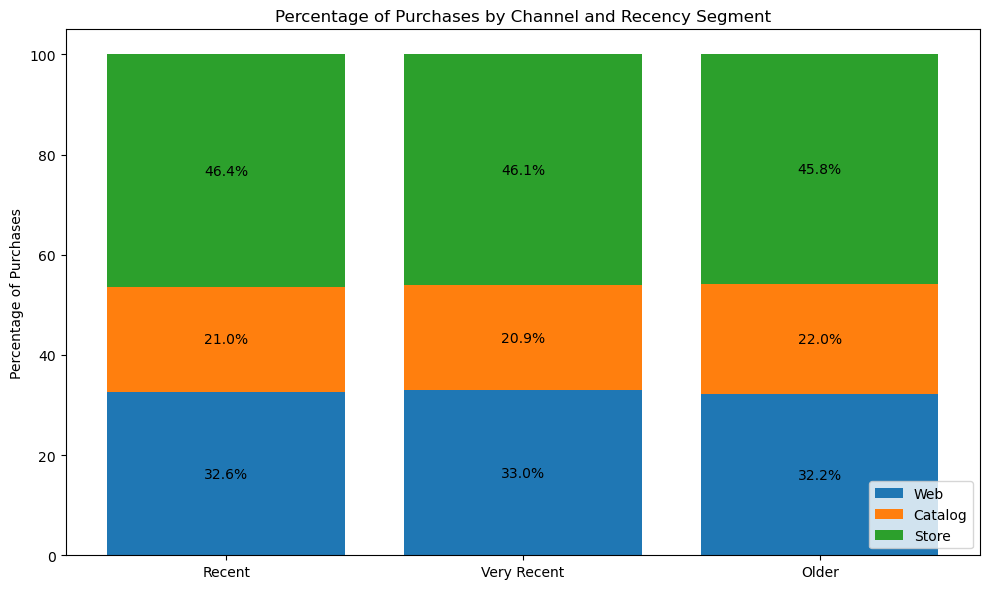

In [91]:
#-------------------Complementary cleaning----------------#
# Rename columns
df4.columns = [
    'recency_segment',
    'web_purchases_percentage',
    'catalog_purchases_percentage',
    'store_purchases_percentage'
]

#-------------------Creating visualization----------------#
# Create the stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Create the stacked bars
ax.bar(df4['recency_segment'], df4['web_purchases_percentage'], label='Web')
ax.bar(df4['recency_segment'], df4['catalog_purchases_percentage'], 
       bottom=df4['web_purchases_percentage'], label='Catalog')
ax.bar(df4['recency_segment'], df4['store_purchases_percentage'],
       bottom=df4['web_purchases_percentage'] + df4['catalog_purchases_percentage'], 
       label='Store')

# Customize the chart
ax.set_ylabel('Percentage of Purchases')
ax.set_title('Percentage of Purchases by Channel and Recency Segment')
ax.legend(loc='lower right')

# Add percentage labels on the bars
for i, row in df4.iterrows():
    web = row['web_purchases_percentage']
    catalog = row['catalog_purchases_percentage']
    store = row['store_purchases_percentage']
    
    ax.text(i, web/2, f'{web:.1f}%', ha='center', va='center')
    ax.text(i, web + catalog/2, f'{catalog:.1f}%', ha='center', va='center')
    ax.text(i, web + catalog + store/2, f'{store:.1f}%', ha='center', va='center')

# Display the plot
plt.tight_layout()
plt.show()